In [12]:
import pandas as pd

# Anomaly Detection

In [24]:
df = pd.read_json('anomaly_detection/results/aucs.json')
df = df.drop(index='catch')

ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)

df_show = df.copy()
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)
df

,nyc_taxi,ec2_request_latency_system_failure,msl,swat,smap,smd,mean_rank
patchtrad,0.9222,0.9987,0.6607,0.8446,0.6597,0.8693,2.666667
patchtst,0.6957,0.9989,0.6265,0.8426,0.6220,0.8818,4.000000
jepa,0.8482,0.9945,0.6304,0.8150,0.6887,0.8594,5.166667
patchad,0.9718,0.9984,0.6220,0.8225,0.6709,0.8176,5.666667
gat,0.6888,0.9989,0.6167,0.8156,0.6460,0.8197,6.333333
aelstm,0.6637,0.9985,0.6119,0.8402,0.6182,0.8280,7.666667
lstm,0.5107,0.9987,0.5950,0.8419,0.6039,0.8334,8.000000
tranad,0.5511,0.9672,0.6436,0.8149,0.5813,0.8835,8.166667
lstm_rev,0.6462,0.9984,0.6271,0.2383,0.5863,0.8582,9.000000
patchtst_rev,0.5521,0.9987,0.6255,0.2327,0.5367,0.8728,9.333333


# Forecasting

In [3]:
df = pd.read_json('forecasting/results/mse.json')

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df

,etth1,etth2,ettm1,ettm2,mean_rank,encoder,scratch
JEPAtchTST,0.457436,0.180563,0.411781,0.118213,1.50,freeze,False
JEPAtchTST,0.465032,0.188330,0.429293,0.116340,1.75,trainable,False
PatchTST,0.474271,0.226031,0.437121,0.117943,2.75,trainable,True


# Classification

In [6]:
df = pd.read_json('classification/results/accs.json')

ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df

,signals_classification,mean_rank,encoder,scratch
JEPAtchTST,0.900000,1.0,trainable,False
JEPAtchTST,0.766667,2.0,freeze,False
PatchTST,0.606667,3.0,trainable,True


(-0.5, 799.5, 599.5, -0.5)

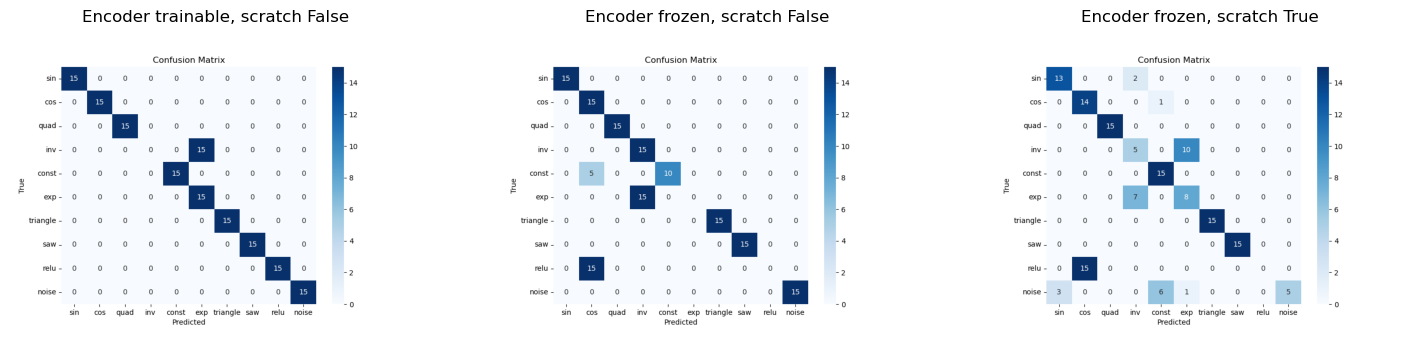

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img_encoder_finetune = Image.open('classification/results/confusion_matrix_False_False.png')
img_encoder_freeze = Image.open('classification/results/confusion_matrix_True_False.png')
img_encoder_scratch = Image.open('classification/results/confusion_matrix_True_True.png')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_encoder_finetune)
axes[0].set_title('Encoder trainable, scratch False')
axes[0].axis('off')

axes[1].imshow(img_encoder_freeze)
axes[1].set_title('Encoder frozen, scratch False')
axes[1].axis('off')

axes[2].imshow(img_encoder_scratch)
axes[2].set_title('Encoder frozen, scratch True')
axes[2].axis('off')